# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation:

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + q
m = 2 # slope
q = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

y_target = m * x_valid + q # ideal (target) linear function

sigma = 0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

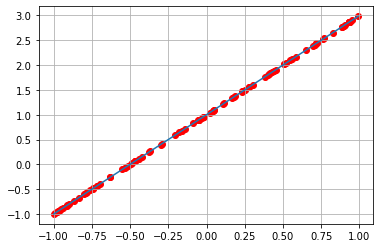

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [5]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 7ms/step - loss: 2.8055 - mse: 2.8055 - val_loss: 2.2399 - val_mse: 2.2399
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 1.6232 - mse: 1.6232 - val_loss: 1.3663 - val_mse: 1.3663
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.9916 - mse: 0.9916 - val_loss: 0.8643 - val_mse: 0.8643
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6261 - mse: 0.6261 - val_loss: 0.5538 - val_mse: 0.5538
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3996 - mse: 0.3996 - val_loss: 0.3571 - val_mse: 0.3571
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2572 - mse: 0.2572 - val_loss: 0.2310 - val_mse: 0.2310
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1662 - mse: 0.1662 - val_loss: 0.1494 - val_mse: 0.1494
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1074 - mse: 0.10

In [8]:
# return weights
model.get_weights()#[0][0][0]

[array([[1.9957422]], dtype=float32), array([0.99991375], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 7.0112e-06 - mse: 7.0112e-06

Test loss: 7.011197340034414e-06
Test accuracy: 7.011197340034414e-06


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 7.0112e-06 - mse: 7.0112e-06

Test loss: 7.011197340034414e-06
Test accuracy: 7.011197340034414e-06


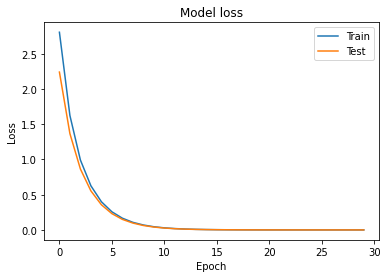

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

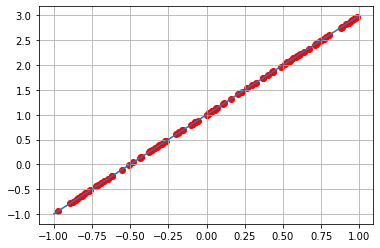

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

From the previous try we found out that:

$N_{\text{epochs}} = 30; N_{\text{train}} = 1000; \sigma = 0: $
- $m = 1.9945724; q = 0.99990565$

Now let's change some parametre. 

### $i)$

In [103]:
N = 500
sigma = 0.5
epochs = 30

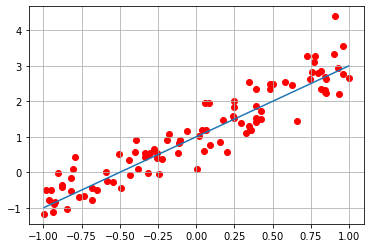

In [104]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

y_target = m * x_valid + q # ideal (target) linear function

#sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [105]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 1s 14ms/step - loss: 1.5685 - mse: 1.5685 - val_loss: 1.4896 - val_mse: 1.4896
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 1.1181 - mse: 1.1181 - val_loss: 1.0950 - val_mse: 1.0950
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.8509 - mse: 0.8509 - val_loss: 0.8413 - val_mse: 0.8413
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6809 - mse: 0.6809 - val_loss: 0.6758 - val_mse: 0.6758
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5708 - mse: 0.5708 - val_loss: 0.5619 - val_mse: 0.5619
Ep

In [106]:
model.get_weights()

[array([[1.8923585]], dtype=float32), array([0.95957863], dtype=float32)]

In [107]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2098 - mse: 0.2098

Test loss: 0.20983284711837769
Test accuracy: 0.20983284711837769
4/4 [==============================] - 0s 2ms/step - loss: 0.0059 - mse: 0.0059

Test loss: 0.005946651566773653
Test accuracy: 0.005946651566773653


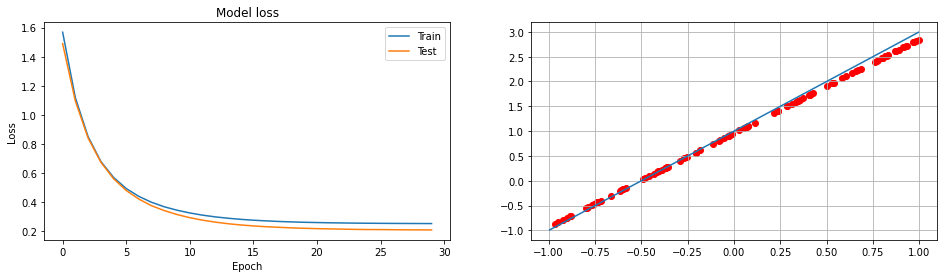

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r')
ax2.plot(x_valid, y_target)
ax2.grid(True)

$N_{\text{epochs}} = 30; N_{\text{train}} = 500; \sigma = 0.5: $
- $m = 1.8923585; q = 0.95957863$

### $ii)$

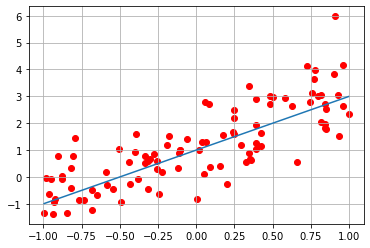

In [125]:
N = 500
sigma = 1
epochs = 50

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

y_target = m * x_valid + q # ideal (target) linear function

#sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [128]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 1.8688 - mse: 1.8688 - val_loss: 1.8177 - val_mse: 1.8177
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 1.5197 - mse: 1.5197 - val_loss: 1.4782 - val_mse: 1.4782
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3262 - mse: 1.3262 - val_loss: 1.2707 - val_mse: 1.2707
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.2166 - mse: 1.2166 - val_loss: 1.1438 - val_mse: 1.1438
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1525 - mse: 1.1525 - val_loss: 1.0591 - val_mse: 1.0591
Ep

In [129]:
model.get_weights()

[array([[1.8867849]], dtype=float32), array([0.92184764], dtype=float32)]

4/4 [==============================] - 0s 2ms/step - loss: 0.8294 - mse: 0.8294

Test loss: 0.8293989300727844
Test accuracy: 0.8293989300727844
4/4 [==============================] - 0s 4ms/step - loss: 0.0110 - mse: 0.0110    

Test loss: 0.01097926776856184
Test accuracy: 0.01097926776856184


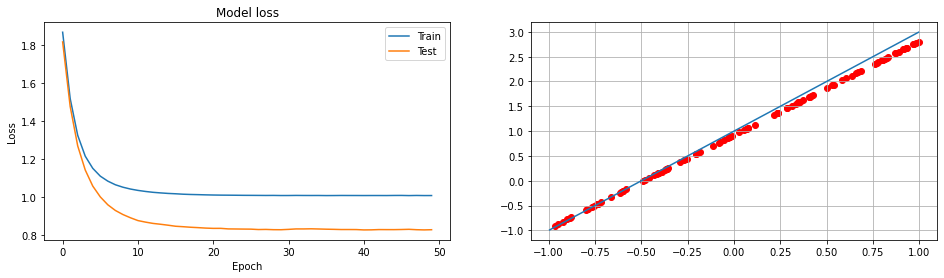

In [130]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r')
ax2.plot(x_valid, y_target)
ax2.grid(True)

$N_{\text{epochs}} = 50; N_{\text{train}} = 500; \sigma = 1: $
- $m = 1.8867849; q = 0.92184764$

### $iii)$

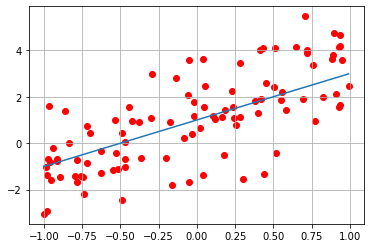

In [131]:
N = 1000
sigma = 1.5
epochs = 50

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

y_target = m * x_valid + q # ideal (target) linear function

#sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [132]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 1s 8ms/step - loss: 2.9156 - mse: 2.9156 - val_loss: 2.4697 - val_mse: 2.4697
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 2.4259 - mse: 2.4259 - val_loss: 2.1730 - val_mse: 2.1730
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 2.2618 - mse: 2.2618 - val_loss: 2.0483 - val_mse: 2.0483
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 2.1981 - mse: 2.1981 - val_loss: 1.9877 - val_mse: 1.9877
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 2.1711 - mse: 2.1711 - val_loss: 1.9493 - val_mse: 1.9493
Epo

In [133]:
model.get_weights()

[array([[2.0184772]], dtype=float32), array([1.0261447], dtype=float32)]

4/4 [==============================] - 0s 2ms/step - loss: 1.8452 - mse: 1.8452

Test loss: 1.8451975584030151
Test accuracy: 1.8451975584030151
4/4 [==============================] - 0s 2ms/step - loss: 7.7825e-04 - mse: 7.7825e-04

Test loss: 0.0007782503962516785
Test accuracy: 0.0007782503962516785


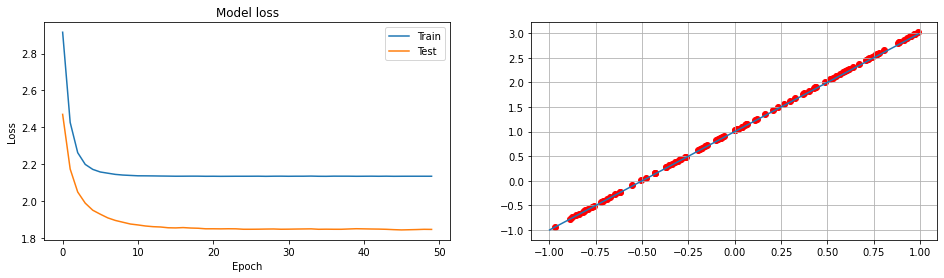

In [134]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r')
ax2.plot(x_valid, y_target)
ax2.grid(True)

$N_{\text{epochs}} = 50; N_{\text{train}} = 1000; \sigma = 1.5: $
- $m =2.0184772; q = 1.0261447$

### $iv)$

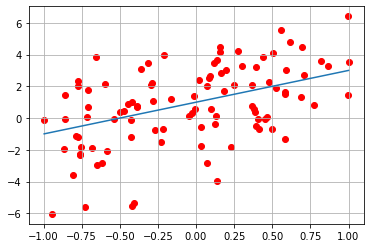

In [143]:
N = 5000
sigma = 2
epochs = 50

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

y_target = m * x_valid + q # ideal (target) linear function

#sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [144]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 1s 2ms/step - loss: 4.4269 - mse: 4.4269 - val_loss: 4.9453 - val_mse: 4.9453
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 3.9421 - mse: 3.9421 - val_loss: 4.7970 - val_mse: 4.7970
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 3.9065 - mse: 3.9065 - val_loss: 4.7561 - val_mse: 4.7561
Epoch 4/50
157/157 [==============================] - 0s 1ms/step - loss: 3.9002 - mse: 3.9002 - val_loss: 4.7289 - val_mse: 4.7289
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 3.8994 - mse: 3.8994 - val_loss: 4.7445 - val_mse: 

In [145]:
model.get_weights()

[array([[1.9632487]], dtype=float32), array([0.9738736], dtype=float32)]

4/4 [==============================] - 0s 2ms/step - loss: 4.7327 - mse: 4.7327

Test loss: 4.732659339904785
Test accuracy: 4.732659339904785
4/4 [==============================] - 0s 2ms/step - loss: 9.7904e-04 - mse: 9.7904e-04

Test loss: 0.0009790417971089482
Test accuracy: 0.0009790417971089482


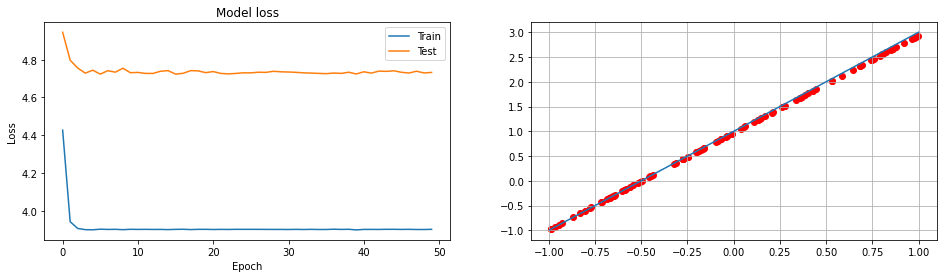

In [146]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r')
ax2.plot(x_valid, y_target)
ax2.grid(True)

$N_{\text{epochs}} = 50; N_{\text{train}} = 5000; \sigma = 2: $
- $m =1.9632487; q = 0.9738736$

### $v)$

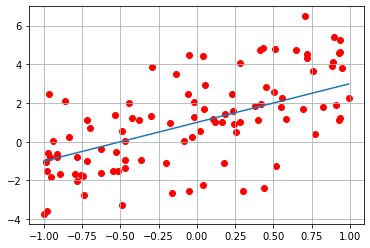

In [206]:
N = 1000
sigma = 2
epochs = 30

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

y_target = m * x_valid + q # ideal (target) linear function

y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

In [207]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 1s 7ms/step - loss: 6.4956 - mse: 6.4956 - val_loss: 6.1531 - val_mse: 6.1531
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 5.3264 - mse: 5.3264 - val_loss: 5.1617 - val_mse: 5.1617
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 4.7253 - mse: 4.7253 - val_loss: 4.5726 - val_mse: 4.5726
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 4.3812 - mse: 4.3812 - val_loss: 4.1989 - val_mse: 4.1989
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 4.1775 - mse: 4.1775 - val_loss: 3.9462 - val_mse: 3.9462
Epo

In [208]:
model.get_weights()

[array([[2.0063965]], dtype=float32), array([1.0282283], dtype=float32)]

4/4 [==============================] - 0s 2ms/step - loss: 3.2866 - mse: 3.2866

Test loss: 3.2866408824920654
Test accuracy: 3.2866408824920654
4/4 [==============================] - 0s 2ms/step - loss: 7.9860e-04 - mse: 7.9860e-04

Test loss: 0.0007986038690432906
Test accuracy: 0.0007986038690432906


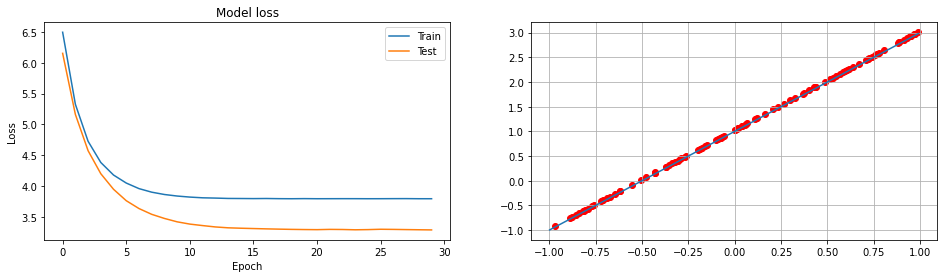

In [209]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r')
ax2.plot(x_valid, y_target)
ax2.grid(True)

$N_{\text{epochs}} = 30; N_{\text{train}} = 1000; \sigma = 2: $
- $m =2.0063965; q = 1.0282283$

#### RESULTS:
case |$\sigma$ | $N_{\text{train}}$|$N_{\text{epochs}}$|m|q
-----|---------|--------------------|-------------------|-|-
$o)$   |0|1000|30|1.9945724| 0.99990565
$i)$   |0.5|500|30|1.8923585|0.95957863
$ii)$  |1|500|50|1.8867849|0.92184764
$iii)$ |1,5|1000|50|2.0184772|1.0261447
$iv)$  |2|5000|50|1.9632487|0.9738736
$v)$   |2|1000|30|2.0063965|1.0282283

We can see from this summary table that it doesn't really matter the number of training point if $\sigma$ is quite big, probably, because of the possibility of overfitting the training point. Also if the number of training point is quite small, the NN doesn't manage to fit the points. So I found that 1000 is the best number of training point.

Also an abundance of epochs doesn't lead to a better fit: after around 15-20 epochs, the loss cost remains stable. It turns out that 30 epochs is the best for this NN.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [221]:
# target parameters of f(x)=a+bx+cx^2+dx^3
a = +4
b = -3
c = -2
d = +3

In [328]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()

y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3

sigma = 0.5
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

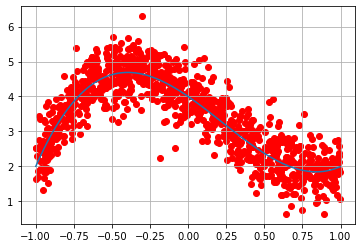

In [329]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True)
plt.show()

### $i)$

In [330]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(1,),activation='tanh'))
model.add(Dense(8, activation='elu'))
model.add(Dense(1,activation='elu'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_275 (Dense)            (None, 128)               256       
_________________________________________________________________
dense_276 (Dense)            (None, 8)                 1032      
_________________________________________________________________
dense_277 (Dense)            (None, 1)                 9         
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [331]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=25,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/25
313/313 [==============================] - 1s 2ms/step - loss: 2.0284 - mse: 2.0284 - val_loss: 0.7915 - val_mse: 0.7915
Epoch 2/25
313/313 [==============================] - 0s 1ms/step - loss: 0.6111 - mse: 0.6111 - val_loss: 0.4471 - val_mse: 0.4471
Epoch 3/25
313/313 [==============================] - 0s 1ms/step - loss: 0.3686 - mse: 0.3686 - val_loss: 0.3303 - val_mse: 0.3303
Epoch 4/25
313/313 [==============================] - 0s 1ms/step - loss: 0.3053 - mse: 0.3053 - val_loss: 0.2903 - val_mse: 0.2903
Epoch 5/25
313/313 [==============================] - 0s 1ms/step - loss: 0.2878 - mse: 0.2878 - val_loss: 0.2908 - val_mse: 0.2908
Epoch 6/25
313/313 [==============================] - 0s 1ms/step - loss: 0.2801 - mse: 0.2801 - val_loss: 0.2806 - val_mse: 0.2806
Epoch 7/25
313/313 [==============================] - 0s 1ms/step - loss: 0.2781 - mse: 0.2781 - val_loss: 0.2767 - val_mse: 0.2767
Epoch 8/25
313/313 [==============================] - 0s 1ms/step - loss: 0.

32/32 [==============================] - 0s 915us/step - loss: 0.2688 - mse: 0.2688

Test loss: 0.26878777146339417
Test accuracy: 0.26878777146339417
32/32 [==============================] - 0s 965us/step - loss: 0.0245 - mse: 0.0245

Test loss: 0.024519527330994606
Test accuracy: 0.024519527330994606


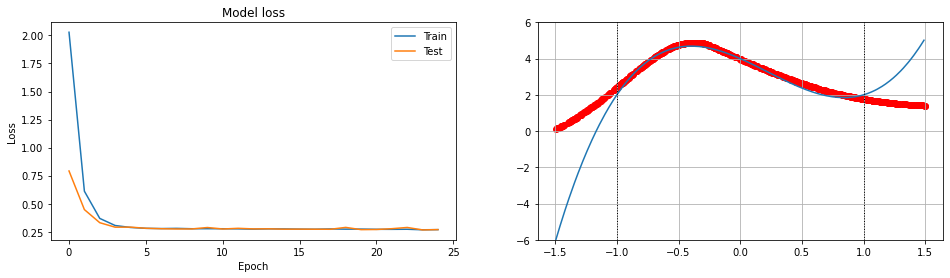

In [332]:
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# print
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_pred = np.random.uniform(-1.5, 1.5, 500)
y_pred = model.predict(x_pred)

x_val = np.random.uniform(-1.5, 1.5, 500)
x_val.sort()
y_tar = a + b * x_val + c * x_val**2 + d * x_val**3

ax2.scatter(x_pred, y_pred,color='r')
ax2.plot(x_val, y_tar)
ax2.axvline( -1,  c="black", lw=1, ls=':'); plt.axvline( 1,  c="black", lw=1, ls=':')
ax2.set_ylim(-6,6) 
ax2.grid(True)

### $ii)$

In [333]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,),activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4,activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(1, activation='elu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_278 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_279 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_280 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_281 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_282 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 5         
Total params: 231
Trainable params: 231
Non-trainable params: 0
_______________________________________________________

In [334]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6582 - mse: 0.6582 - val_loss: 0.5134 - val_mse: 0.5134
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.3071 - val_mse: 0.3071
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2919 - mse: 0.2919 - val_loss: 0.2783 - val_mse: 0.2783
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2735 - mse: 0.2735 - val_loss: 0.4288 - val_mse: 0.4288
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2684 - mse: 0.2684 - val_loss: 0.2589 - val_mse: 0.2589
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2677 - mse: 0.2677 - val_loss: 0.2577 - val_mse: 0.2577
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2669 - mse: 0.2669 - val_loss: 0.3343 - val_mse: 0.3343
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - 

32/32 [==============================] - 0s 933us/step - loss: 0.2605 - mse: 0.2605

Test loss: 0.2605397701263428
Test accuracy: 0.2605397701263428
32/32 [==============================] - 0s 901us/step - loss: 0.0107 - mse: 0.0107

Test loss: 0.010672740638256073
Test accuracy: 0.010672740638256073


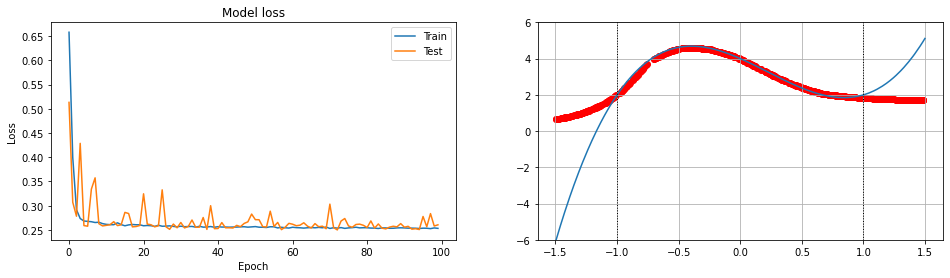

In [335]:
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# print
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_pred = np.random.uniform(-1.5, 1.5, 500)
y_pred = model.predict(x_pred)

x_val = np.random.uniform(-1.5, 1.5, 500)
x_val.sort()
y_tar = a + b * x_val + c * x_val**2 + d * x_val**3

ax2.scatter(x_pred, y_pred,color='r')
ax2.plot(x_val, y_tar)
ax2.axvline( -1,  c="black", lw=1, ls=':'); plt.axvline( 1,  c="black", lw=1, ls=':')
ax2.set_ylim(-6,6) 
ax2.grid(True)

### $iii)$

In [342]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(1,),activation='sigmoid'))
model.add(Dense(16, input_shape=(1,),activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(1,activation='elu'))

# model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 128)               256       
_________________________________________________________________
dense_298 (Dense)            (None, 16)                2064      
_________________________________________________________________
dense_299 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_300 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_301 (Dense)            (None, 1)                 5         
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [343]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 1.1570 - mse: 1.1570 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 2/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6656 - mse: 0.6656 - val_loss: 0.4278 - val_mse: 0.4278
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3341 - mse: 0.3341 - val_loss: 0.2769 - val_mse: 0.2769
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2810 - mse: 0.2810 - val_loss: 0.2854 - val_mse: 0.2854
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2733 - mse: 0.2733 - val_loss: 0.2652 - val_mse: 0.2652
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.2722 - mse: 0.2722 - val_loss: 0.2624 - val_mse: 0.2624
Epoch 7/100
313/313 [==============================] - 0s 2ms/step - loss: 0.2683 - mse: 0.2683 - val_loss: 0.2598 - val_mse: 0.2598
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - 

32/32 [==============================] - 0s 1ms/step - loss: 0.2575 - mse: 0.2575

Test loss: 0.25749585032463074
Test accuracy: 0.25749585032463074
32/32 [==============================] - 0s 1ms/step - loss: 0.0063 - mse: 0.0063

Test loss: 0.0062840161845088005
Test accuracy: 0.0062840161845088005


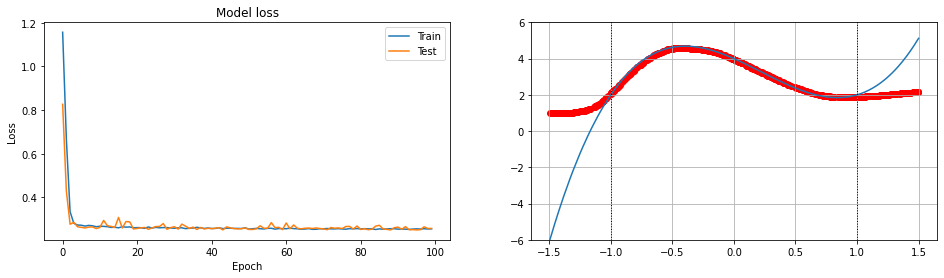

In [344]:
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# print
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_pred = np.random.uniform(-1.5, 1.5, 500)
y_pred = model.predict(x_pred)

x_val = np.random.uniform(-1.5, 1.5, 500)
x_val.sort()
y_tar = a + b * x_val + c * x_val**2 + d * x_val**3

ax2.scatter(x_pred, y_pred,color='r')
ax2.plot(x_val, y_tar)
ax2.axvline( -1,  c="black", lw=1, ls=':'); plt.axvline( 1,  c="black", lw=1, ls=':')
ax2.set_ylim(-6,6) 
ax2.grid(True)

### $iv)$

In [349]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,),activation='tanh'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(1, activation='elu'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_314 (Dense)            (None, 32)                64        
_________________________________________________________________
dense_315 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_316 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_317 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_318 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_319 (Dense)            (None, 1)                 17        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_______________________________________________________

In [350]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=75,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/75
313/313 [==============================] - 1s 2ms/step - loss: 1.7151 - mse: 1.7151 - val_loss: 0.4174 - val_mse: 0.4174
Epoch 2/75
313/313 [==============================] - 0s 1ms/step - loss: 0.2952 - mse: 0.2952 - val_loss: 0.2654 - val_mse: 0.2654
Epoch 3/75
313/313 [==============================] - 0s 2ms/step - loss: 0.2664 - mse: 0.2664 - val_loss: 0.2784 - val_mse: 0.2784
Epoch 4/75
313/313 [==============================] - 0s 1ms/step - loss: 0.2623 - mse: 0.2623 - val_loss: 0.2610 - val_mse: 0.2610
Epoch 5/75
313/313 [==============================] - 0s 2ms/step - loss: 0.2585 - mse: 0.2585 - val_loss: 0.2557 - val_mse: 0.2557
Epoch 6/75
313/313 [==============================] - 1s 2ms/step - loss: 0.2587 - mse: 0.2587 - val_loss: 0.2580 - val_mse: 0.2580
Epoch 7/75
313/313 [==============================] - 1s 2ms/step - loss: 0.2558 - mse: 0.2558 - val_loss: 0.2534 - val_mse: 0.2534
Epoch 8/75
313/313 [==============================] - 1s 2ms/step - loss: 0.

32/32 [==============================] - 0s 982us/step - loss: 0.2507 - mse: 0.2507

Test loss: 0.2507167160511017
Test accuracy: 0.2507167160511017
32/32 [==============================] - 0s 988us/step - loss: 0.0024 - mse: 0.0024

Test loss: 0.002435573609545827
Test accuracy: 0.002435573609545827


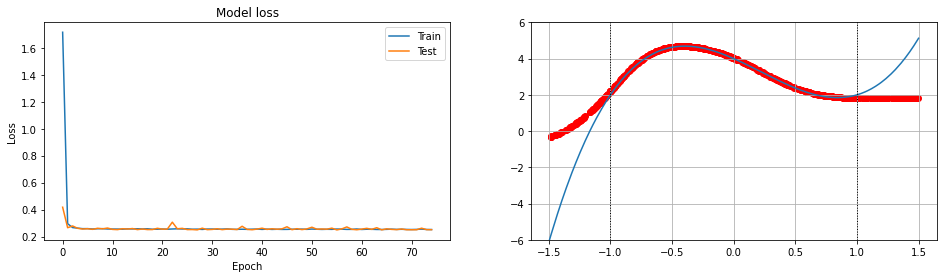

In [351]:
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# print
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

x_pred = np.random.uniform(-1.5, 1.5, 500)
y_pred = model.predict(x_pred)

x_val = np.random.uniform(-1.5, 1.5, 500)
x_val.sort()
y_tar = a + b * x_val + c * x_val**2 + d * x_val**3

ax2.scatter(x_pred, y_pred,color='r')
ax2.plot(x_val, y_tar)
ax2.axvline( -1,  c="black", lw=1, ls=':'); plt.axvline( 1,  c="black", lw=1, ls=':')
ax2.set_ylim(-6,6) 
ax2.grid(True)

#### Comments:
- I fitted the function in the interval $(-1,1)$; with $\sigma = 0.5$, and $10000$ training points.
- I made also some test with more than 10000, (i.e. 50000 points) but without any great surprise.
- In the differents attempts, I found out that some activation functions worked better than others, in particular elu and relu were the best, followed by tanh.
- The best optimizer  turned out to be the adam one, and the best loss function was the mean squared error
- Also in this case an elevate number of epochs don't lead to a better fit of our function, the loss function stabilize after twenty epochs, neither an high number of neurons per layer. I think that this fact is due to the relativity semplicity of our sample, too many parametres could over fit the function and don't work well.
- The right function branch is never well fitted, maybe beacause of a lack of training points.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [302]:
# generate training inputs
np.random.seed(0)
x_training = np.random.uniform(-1.5, 1.5, (10000,2))
x_train = x_training.T[0]
y_train = x_training.T[1]

x_validing = np.random.uniform(-1.5, 1.5, (1000,2))
x_valid = x_validing.T[0]
y_valid = x_validing.T[1]

z_target = np.sin(x_valid**2 + x_valid**2)

sigma = 0.5# noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

<Figure size 432x288 with 0 Axes>

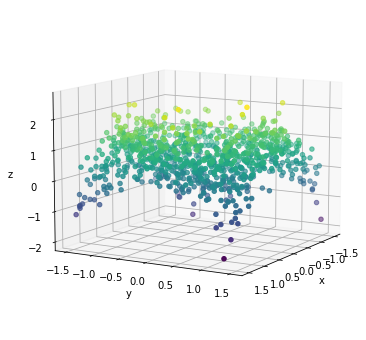

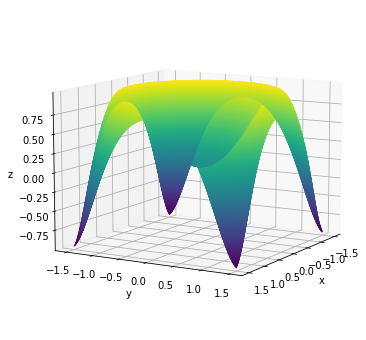

In [303]:
plot1 = plt.figure(1)
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.scatter(x_valid, y_valid, z_valid, c = z_valid)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)


x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X**2+Y**2)

plot2 = plt.figure(2)
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.contour3D(X, Y, Z, 1000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.grid(True)
plt.show()

In [304]:
model = tf.keras.Sequential()
model.add(Dense(12, input_shape=(2,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 12)                36        
_________________________________________________________________
dense_153 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_154 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_155 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_156 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_157 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_158 (Dense)            (None, 4)               

In [305]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_training, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_validing, z_valid))

Epoch 1/100
313/313 [==============================] - 2s 2ms/step - loss: 0.4130 - mse: 0.4130 - val_loss: 0.3907 - val_mse: 0.3907
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4037 - mse: 0.4037 - val_loss: 0.3906 - val_mse: 0.3906
Epoch 3/100
313/313 [==============================] - 0s 2ms/step - loss: 0.4020 - mse: 0.4020 - val_loss: 0.3890 - val_mse: 0.3890
Epoch 4/100
313/313 [==============================] - 0s 2ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.3870 - val_mse: 0.3870
Epoch 5/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3977 - mse: 0.3977 - val_loss: 0.3851 - val_mse: 0.3851
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.3841 - val_mse: 0.3841
Epoch 7/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3902 - mse: 0.3902 - val_loss: 0.3794 - val_mse: 0.3794
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - 

In [306]:
# evaluate model
score = model.evaluate(x_validing, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_validing, z_valid, batch_size=64, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 988us/step - loss: 0.2538 - mse: 0.2538

Test loss: 0.25378426909446716
Test accuracy: 0.25378426909446716
16/16 [==============================] - 0s 1ms/step - loss: 0.2538 - mse: 0.2538

Test loss: 0.25378429889678955
Test accuracy: 0.25378429889678955


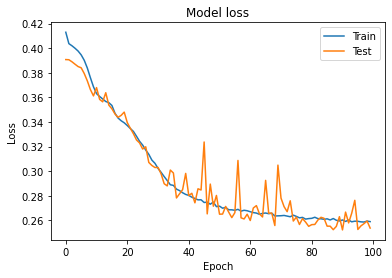

In [307]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

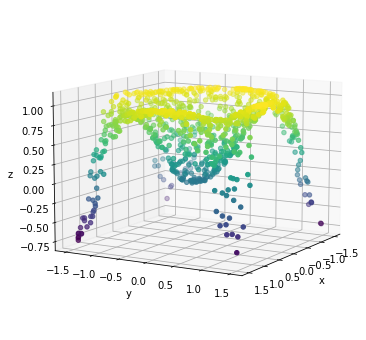

In [308]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
x_predicted = np.random.uniform(-1.5, 1.5, (1000,2))
X = x_predicted.T[0]
Y = x_predicted.T[1]
z_predicted = model.predict(x_predicted)
ax.scatter(X,Y, z_predicted,c = z_predicted)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
ax.grid(True)

#### Comments:

 - In the first graph we can see the loss function becoming smaller and smaller.
 - In the second graph the prediction of our NN is really near to the given function 


I used:
- 10000 training point
- 100 epochs
- $\sigma = 0.5$

and the following NN

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [47]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

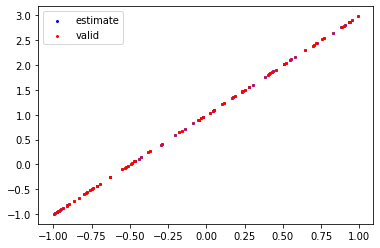

[array([[1.9999704]], dtype=float32), array([0.9999981], dtype=float32)]

In [48]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()